In [1]:
import numpy as np
import os 
import arviz as az
import pandas as pd
import math
from scipy import stats
from scipy.stats import norm
import xarray as xr
import copy
import matplotlib.pyplot as plt
os.chdir("..\\..\\sparklyRGT_tutorial") 
import sparklyRGT as rgt
os.chdir("..\\Pystan") 
import model_data as md
pd.set_option('display.max_rows',100)

I am being executed!


In [2]:
os.chdir('nc_files')

C:\Users\brett\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
loss_basic_fit = az.from_netcdf('loss_basic_fit.nc')
outcome_basic_fit = az.from_netcdf('outcome_basic_fit.nc')
random_basic_fit = az.from_netcdf('random_basic_fit.nc')
reverse_basic_fit = az.from_netcdf('reverse_basic_fit.nc')
standard_basic_fit = az.from_netcdf('standard_basic_fit.nc')
uncued_basic_fit = az.from_netcdf('uncued_basic_fit.nc')

loss_basicstar_fit = az.from_netcdf('loss_basic-star_fit.nc')
outcome_basicstar_fit = az.from_netcdf('outcome_basic-star_fit.nc')
random_basicstar_fit = az.from_netcdf('random_basic-star_fit.nc')
reverse_basicstar_fit = az.from_netcdf('reverse_basic-star_fit.nc')
standard_basicstar_fit = az.from_netcdf('standard_basic-star_fit.nc')
uncued_basicstar_fit = az.from_netcdf('uncued_basic-star_fit.nc')

loss_pscale_fit = az.from_netcdf('loss_pscale_fit.nc')
outcome_pscale_fit = az.from_netcdf('outcome_pscale_fit.nc')
random_pscale_fit = az.from_netcdf('random_pscale_fit.nc')
reverse_pscale_fit = az.from_netcdf('reverse_pscale_fit.nc')
standard_pscale_fit = az.from_netcdf('standard_pscale_fit.nc')
uncued_pscale_fit = az.from_netcdf('uncued_pscale_fit.nc')

loss_pscalestar_fit = az.from_netcdf('loss_pscale-star_fit.nc')
outcome_pscalestar_fit = az.from_netcdf('outcome_pscale-star_fit.nc')
random_pscalestar_fit = az.from_netcdf('random_pscale-star_fit.nc')
reverse_pscalestar_fit = az.from_netcdf('reverse_pscale-star_fit.nc')
standard_pscalestar_fit = az.from_netcdf('standard_pscale-star_fit.nc')
uncued_pscalestar_fit = az.from_netcdf('uncued_pscale-star_fit.nc')

loss_pindep_fit = az.from_netcdf('loss_pindep_fit.nc')
outcome_pindep_fit = az.from_netcdf('outcome_pindep_fit.nc')
random_pindep_fit = az.from_netcdf('random_pindep_fit.nc')
reverse_pindep_fit = az.from_netcdf('reverse_pindep_fit.nc')
standard_pindep_fit = az.from_netcdf('standard_pindep_fit.nc')
uncued_pindep_fit = az.from_netcdf('uncued_pindep_fit.nc')

loss_pindepstar_fit = az.from_netcdf('loss_pindep-star_fit.nc')
outcome_pindepstar_fit = az.from_netcdf('outcome_pindep-star_fit.nc')
random_pindepstar_fit = az.from_netcdf('random_pindep-star_fit.nc')
reverse_pindepstar_fit = az.from_netcdf('reverse_pindep-star_fit.nc')
standard_pindepstar_fit = az.from_netcdf('standard_pindep-star_fit.nc')
uncued_pindepstar_fit = az.from_netcdf('uncued_pindep-star_fit.nc')

##my code for setting parameter names below assumes you'll call the independent models 'pindep' and 'pindepstar'

In [13]:
pd.set_option('display.max_rows',350)
az.summary(uncued_pindep_fit).head(10)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_pr[0],-2.012,0.044,-2.095,-1.927,0.001,0.001,959.0,1559.0,1.00
mu_pr[1],-2.138,0.082,-2.299,-1.986,0.004,0.003,450.0,1031.0,1.01
mu_pr[2],-2.478,0.158,-2.807,-2.208,0.010,0.007,250.0,575.0,1.01
mu_pr[3],-1.742,0.605,-2.917,-0.648,0.014,0.010,1813.0,1916.0,1.00
mu_pr[4],0.342,0.275,-0.028,0.870,0.017,0.012,284.0,539.0,1.01
mu_pr[5],0.310,0.168,0.093,0.638,0.010,0.007,238.0,522.0,1.01
mu_pr[6],0.271,0.140,0.087,0.551,0.008,0.006,280.0,472.0,1.01
sigma[0],0.178,0.040,0.113,0.254,0.001,0.001,1091.0,1355.0,1.00
sigma[1],0.361,0.070,0.241,0.489,0.002,0.002,844.0,1311.0,1.00
sigma[2],0.321,0.073,0.190,0.454,0.003,0.002,795.0,1403.0,1.00


In [17]:
uncued_pindep_fit

Inference data with groups:
	> posterior
	> sample_stats

In [ ]:
standard_pindep_fit.posterior.etaNegative[0]

In [ ]:
loss_pindep_fit.posterior.etaNegative[0]

In [15]:
#this function is for transforming the plots into the right parameter space
#(for parameters that got phi_approx in the model code)
def transform1(dataset):
    variable = norm.pdf(dataset.mu_pr.values)
    dataset.mu_pr.values = variable
    return dataset

In [4]:
#print all the values for each parameter for each draw for each chain (1000 per 4 chains)
uncued_pindep_fit.posterior.mu_pr.values

array([[[-2.02619756, -2.16599922, -2.55926463, ...,  0.68902045,
          0.42912937,  0.45935183],
        [-2.04849345, -2.18608838, -2.68676717, ...,  0.82872742,
          0.53081807,  0.621645  ],
        [-2.00497019, -2.13198538, -2.74640468, ...,  0.922292  ,
          0.64929647,  0.67841664],
        ...,
        [-2.05963986, -2.1064601 , -2.57563035, ...,  0.46610598,
          0.34037013,  0.29779121],
        [-2.02292515, -2.08795582, -2.46193407, ...,  0.62402615,
          0.34883994,  0.33715059],
        [-2.00941027, -2.11403685, -2.44823774, ...,  0.58852161,
          0.32039642,  0.3058242 ]],

       [[-2.04610357, -2.18771656, -2.34772876, ...,  0.18418797,
          0.19264656,  0.19071432],
        [-2.04794847, -2.18819556, -2.34000254, ...,  0.11463647,
          0.22811741,  0.1795842 ],
        [-2.11571986, -2.15841499, -2.51556233, ...,  0.39706511,
          0.32681923,  0.23271894],
        ...,
        [-2.01286569, -2.13746763, -2.45665291, ...,  

In [5]:
#summary statistics for the model fit, including mean values of the posterior distribution 
az.summary(uncued_pindep_fit.posterior)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_pr[0],-2.012,0.044,-2.095,-1.927,0.001,0.001,959.0,1559.0,1.00
mu_pr[1],-2.138,0.082,-2.299,-1.986,0.004,0.003,450.0,1031.0,1.01
mu_pr[2],-2.478,0.158,-2.807,-2.208,0.010,0.007,250.0,575.0,1.01
mu_pr[3],-1.742,0.605,-2.917,-0.648,0.014,0.010,1813.0,1916.0,1.00
mu_pr[4],0.342,0.275,-0.028,0.870,0.017,0.012,284.0,539.0,1.01
...,...,...,...,...,...,...,...,...,...
p4[19],0.256,0.220,-0.094,0.693,0.008,0.006,956.0,1083.0,1.00
p4[20],0.104,0.105,-0.046,0.287,0.004,0.003,800.0,1363.0,1.00
p4[21],0.520,0.285,0.144,1.024,0.014,0.010,415.0,781.0,1.01
p4[22],-0.097,0.071,-0.227,0.010,0.001,0.001,2638.0,2031.0,1.00


IndexError: list index out of range

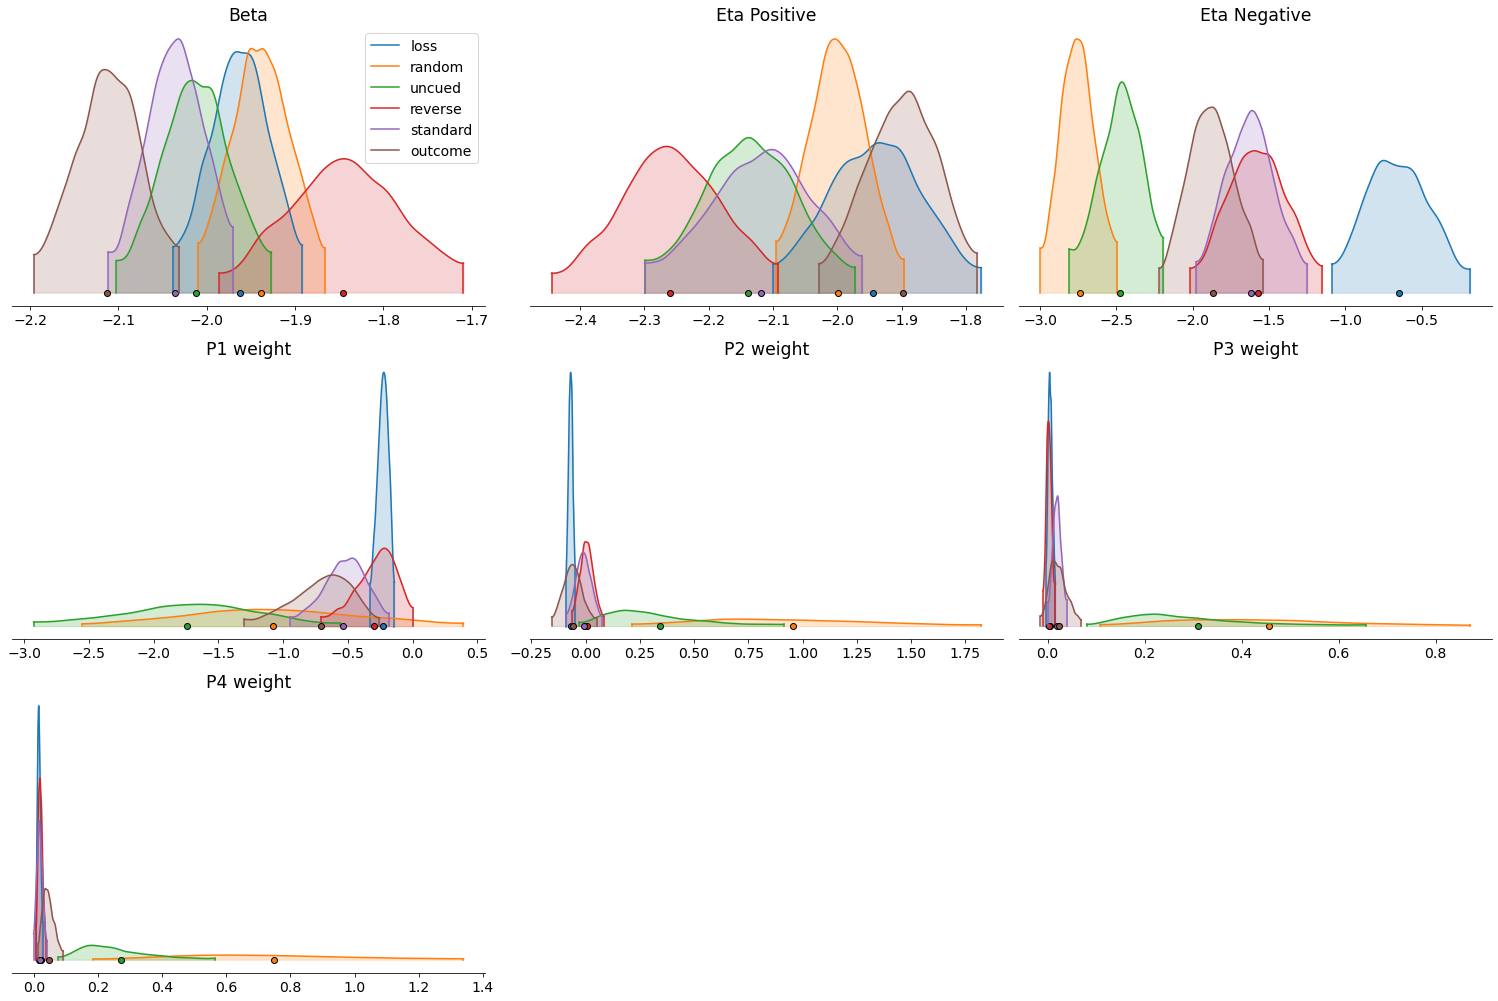

In [5]:
#plot the posterior distributions for group parameters, for diff groups 

##take these figures for parameters that don't need the transform --> m, b, the p weights

##only need to change these - must line up with the names of the datasets and models in the model fit variable names 
## you can add any number of datasets 
dataset = ['loss','random','uncued','reverse', 'standard', 'outcome']
model = 'pindep'

model_names = []
for i in range(len(dataset)):
    model_names.append(locals()[dataset[i] + '_' + model + '_fit'])

ax = az.plot_density(model_names, 
                var_names = 'mu_pr', 
                data_labels = dataset,
                shade = 0.2, 
                hdi_prob = 0.95)

#for setting the titles of the figure:
if model == 'pindep':
    params = ['Beta', 'Eta Positive', 'Eta Negative', 'P1 weight', 'P2 weight', 'P3 weight', 'P4 weight']
elif model == 'pindepstar':
    params = ['Beta', 'Eta', 'P1 weight', 'P2 weight', 'P3 weight', 'P4 weight']
elif 'star' in model:
    #this list will work for both basicstar and pscalestar
    params = ['Beta', 'Eta', 'm', 'b']
else:
    #this list will work for both basic and pscale
    params = ['Beta', 'Eta positive', 'Eta negative', 'm', 'b']

row = list(range(0,math.ceil(len(params)/3))) 
pos = list(range(0,3))
title_num = 0

#crummy code but it works lol
for i in row:
    for j in pos:
        ax[i][j].set_title(params[title_num], fontsize = 'xx-large')
        title_num +=1

IndexError: list index out of range

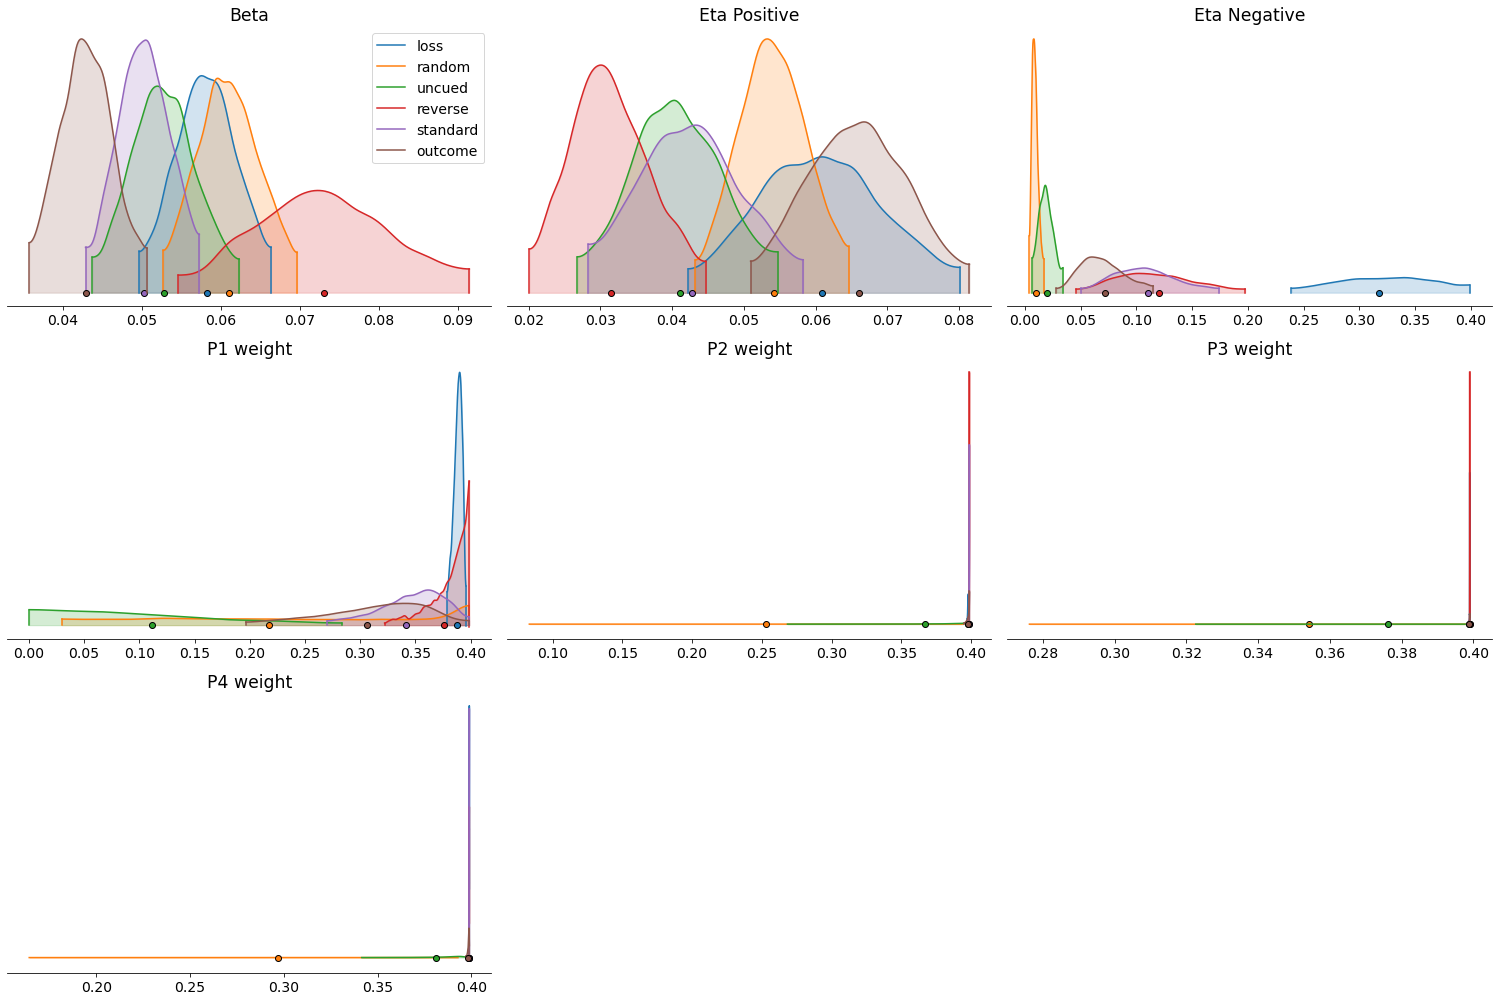

In [6]:
#to get meaningful values for parameters that undergo phi_approx transformation in model code (beta, etapos, etaneg),
#include transform = transform1 as an argument

##take these figures for parameters that do need a transform --> beta, etapos, etaneg, eta

##only need to change these - must line up with the names of the datasets and models in the model fit variable names 
dataset = ['loss','random','uncued','reverse', 'standard', 'outcome']
model = 'pindep'

model_names = []
for i in range(len(dataset)):
    model_names.append(copy.deepcopy(locals()[dataset[i] + '_' + model + '_fit']))

ax = az.plot_density(model_names, 
                var_names = 'mu_pr', 
                data_labels = dataset,
                shade = 0.2, 
                hdi_prob = 0.95,
                transform = transform1)

#for setting the titles of the figure:
if model == 'pindep':
    params = ['Beta', 'Eta Positive', 'Eta Negative', 'P1 weight', 'P2 weight', 'P3 weight', 'P4 weight']
elif model == 'pindepstar':
    params = ['Beta', 'Eta', 'P1 weight', 'P2 weight', 'P3 weight', 'P4 weight']
elif 'star' in model:
    #this list will work for both basicstar and pscalestar
    params = ['Beta', 'Eta', 'm', 'b']
else:
    #this list will work for both basic and pscale
    params = ['Beta', 'Eta positive', 'Eta negative', 'm', 'b']

row = list(range(0,math.ceil(len(params)/3))) 
pos = list(range(0,3))
title_num = 0

for i in row:
    for j in pos:
#         ax[i][j].spines['left'].set_linewidth(2)
        ax[i][j].set_title(params[title_num], fontsize = 'xx-large')
        title_num +=1
        

In [6]:
import math
def round_up(n):
    if n - math.floor(n) < 0.5:
        return math.floor(n)
    return math.ceil(n)

In [7]:
def sample_diff(num_params, fit1, fit2):
    """Takes in num_params (ex. basic = 4), fit1 and fit2 (4 chains) and outputs the sample difference distribution (fit1 - fit2) for the group parameters
    Also outputs Cohen's d, probability of superiority (Prob Sup)... and the distribution's mean, 94% HDI, and probability density to the left and right of 0
    If the 94% HDI does not contain 0, then the parameters are credibly different"""
    
    #variables
    dist = stats.norm()
    _, ax = plt.subplots(round_up(num_params/2), 2, figsize=(20, 10), constrained_layout=True)
    comparisons = [(j) for j in range(num_params)]
    pos = [(k, l) for k in range(round_up(num_params/2)) for l in range(2)]
    #comparisons
    for (j), (k, l) in zip(comparisons, pos):
        print(k,l)
        means_diff = fit1.posterior.mu_pr[:,:,j] - fit2.posterior.mu_pr[:,:,j] #means_diff holds the distribution of the sample difference 
        d_cohen = (means_diff / np.sqrt((fit1.posterior.sigma[:,:,j]**2 + fit2.posterior.sigma[:,:,j]**2) / 2)).mean() 
        ps = dist.cdf(d_cohen/(2**0.5))
        az.plot_posterior(means_diff, ref_val=0, ax=ax[k, l]) #plots posteriors in 2D array of locations: for example, mu_0 - mu_0 will be in the 0,0 box (top left)
        ax[k, l].set_title(f'$\mu_{j}-\mu_{j}$')
        ax[k, l].plot(0, label=f"Cohen's d = {d_cohen.values:.2f}\nProb sup = {ps:.2f}", alpha=0)
        ax[k, l].legend();

0 0
0 1
1 0
1 1
2 0
2 1
3 0


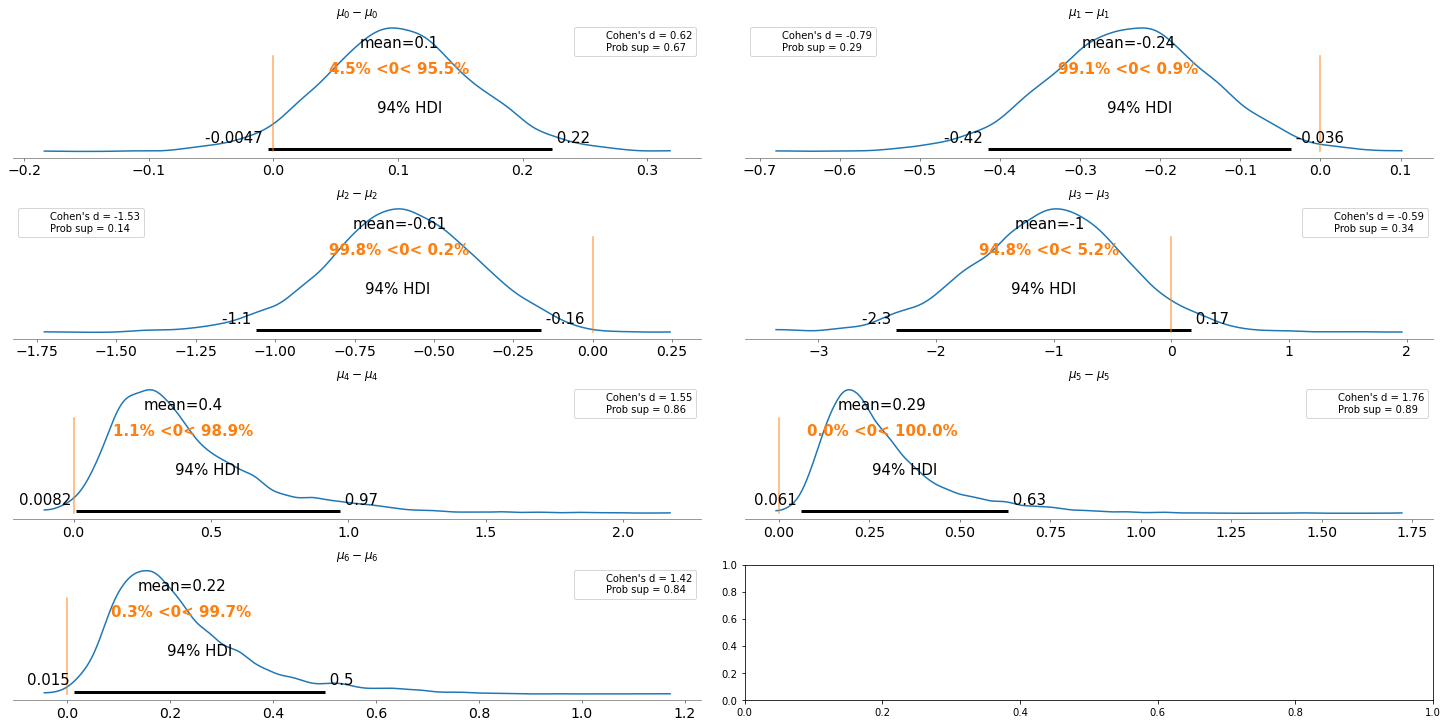

In [24]:
sample_diff(7, uncued_pindep_fit, outcome_pindep_fit)